<p><font size="6"><b>Python for data analysis </b></font></p>


> *Projet Machine Learning IA SCHOOL*  
> *May, 2021*

---

### Description

Ce fichier est celui d’une étude portant sur les facteurs prénataux liés à un accouchement prématuré chez les                  femmes déjà en travail prématuré. Au total, 12 variables ont été recueillies pour 390 femmes enrôlées dans                      l'étude.

### Variables prédictives  => `Features : Caractéristiques ou variables à étudier`

GEST: l'âge gestationnel en semaines à l'entrée dans l'étude

DILATE: la dilatation du col en cm

EFFACE: l’effacement du col (en %) 

CONSIS:la consistance du col (1= mou, 2= moyen, 3=ferme)

CONTR: la présence (=1) ou non (=2) de contraction

MEMBRAN: les membranes rompues (=1) ou non (=2) ou incertain (=3) 

AGE: l’âge de la patiente

GRAVID: la gestité (nombre de grossesses antérieures y compris celle en cours)

PARIT: la parité (nombre de grossesses à terme antérieures)

DIAB: la présence (=1) ou non (=2) d'un problème de diabète, ou valeur manquante (=9)

TRANSF: le transfert (1) ou non (2) vers un hôpital en soins spécialisés

GEMEL: grossesse simple (=1) ou multiple (=2) 

### Variable à prédire

PREMATURE: accouchement prématuré (positif ou négatif)


Tout d’abord, nous allons importer les modules `numpy`, `pandas`, `matplotlib.pyplot` et `sklearn `(uniquement les éléments dont on a besoin), ensuite on charge le fichier Excel comprenant les données. Puis, on affiche les dix premiers enregistrements de l’ensemble des données à l’aide de la fonction `head()` afin d’avoir une idée sur la dataset.

#### Importation des libraries

In [71]:
# Nous commençons par importer les libraries que nous utiliserons tout au long de cette analyse

import pandas as pd # librairie pour lecture et manipulation de donnée

import numpy as np # notre fameuse numpy pour le calcul numérique

import matplotlib.pyplot as plt # pour les visualisations

from sklearn.model_selection import train_test_split
from sklearn import linear_model

# import seaborn
import seaborn as sns

#### Lecture de la base de donnée

In [72]:
prematures = pd.read_excel("data/Prematures.xls")

Un aperçu des 10 premiers enregistrements:

In [73]:
prematures.head(10)

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE
0,31,3,100,3,1,2,26,1,0,2,2,1,positif
1,28,8,0,3,1,2,25,1,0,2,1,2,positif
2,31,3,100,3,2,2,28,2,0,2,1,1,positif
3,27,2,75,3,2,2,27,2,1,2,1,2,positif
4,28,6,75,3,2,2,17,1,0,2,1,1,positif
5,33,2,100,3,1,1,25,2,0,2,1,1,positif
6,32,4,75,3,1,2,25,2,1,2,1,1,positif
7,30,1,50,3,1,2,29,2,1,2,1,1,positif
8,33,0,25,3,1,2,22,1,0,2,2,2,negatif
9,28,0,0,1,1,2,25,3,1,2,2,1,positif


In [74]:
#### Types des variables 
prematures.dtypes

GEST          int64
DILATE        int64
EFFACE        int64
CONSIS        int64
CONTR         int64
MEMBRAN       int64
AGE           int64
GRAVID        int64
PARIT         int64
DIAB          int64
TRANSF        int64
GEMEL         int64
PREMATURE    object
dtype: object

In [75]:
# using dictionary to convert specific columns : CONSIS CONTR MEMBRAN GRAVID PARIT DIAB TRANSF GEMEL
convert_dict = {'CONSIS': str,
                'CONTR': str,
                'MEMBRAN' : str,
                'GRAVID' : str,
                'PARIT' : str,
                'DIAB' : str,
                'TRANSF' : str,
                'GEMEL' : str
               }
  
prematures = prematures.astype(convert_dict)
print(prematures.dtypes)

GEST          int64
DILATE        int64
EFFACE        int64
CONSIS       object
CONTR        object
MEMBRAN      object
AGE           int64
GRAVID       object
PARIT        object
DIAB         object
TRANSF       object
GEMEL        object
PREMATURE    object
dtype: object


In [76]:
prematures.shape

(390, 13)

On peut maintenant se demander s'il y a des données manquantes dans ce dataset? Et si oui, où sont-elles localisées? La librairie Pandas nous offre des outils très utiles pour répondre à cette question et permet même de corriger les données manquantes grâce à des algorithmes puissants.

In [77]:
prematures.isna().sum()

GEST         0
DILATE       0
EFFACE       0
CONSIS       0
CONTR        0
MEMBRAN      0
AGE          0
GRAVID       0
PARIT        0
DIAB         0
TRANSF       0
GEMEL        0
PREMATURE    0
dtype: int64

Cette commande nous montre qu'aucune des variables de la base de donnée ne contient de données manquantes !

- Ensuite, regardons la variable **PREMATURE**

In [78]:
prematures["PREMATURE"].value_counts()

positif    266
negatif    124
Name: PREMATURE, dtype: int64

- Vérifions les modalités possibles de la variable PREMATURE : **Nos labels de classification**

In [79]:
prematures["PREMATURE"].unique()

array(['positif', 'negatif'], dtype=object)

In [80]:
prematures["PREMATURE"].nunique()

2

# I - Analyse univariée et multivariée

Affichons les graphiques d'analyse univariés (à minima un `pie` plot, un `boxplot`) et multivarié (par exemple `correlation` et `radviz`)

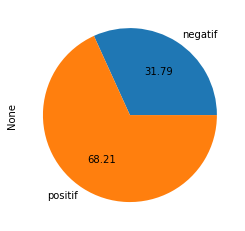

In [81]:
# affichage du pie plot pour la colonne PREMATURE du jeu de donnée avec pandas 
prematures.groupby('PREMATURE').size().plot(kind='pie', autopct='%.2f')

Affichons quelques statistiques univariées sur le jeu de données (`min`, `max`, `mean`, `std`, `quantiles`, ...)

In [86]:
# Affichage des statistiques du jeu de données 
prematures.describe()

,GEST,DILATE,EFFACE,AGE
count,390.000000,390.000000,390.000000,390.000000
mean,30.302564,1.241026,43.979487,26.341026
std,3.145281,1.307821,34.829435,5.150098
min,20.000000,0.000000,0.000000,15.000000
25%,28.000000,0.000000,0.000000,23.000000
50%,31.000000,1.000000,50.000000,26.000000
75%,33.000000,2.000000,75.000000,30.000000
max,35.000000,8.000000,100.000000,42.000000


In [225]:
# calcul de la matrice de corrélation
corrMatrix = prematures.corr()
corrMatrix

,GEST,DILATE,EFFACE,AGE
GEST,1.000000,-0.038397,0.112202,0.045032
DILATE,-0.038397,1.000000,0.531735,-0.073684
EFFACE,0.112202,0.531735,1.000000,-0.040848
AGE,0.045032,-0.073684,-0.040848,1.000000


Une relation linéaire positive existe entre les variables GEST et EFFACE, GEST et AGE, et DILATE et EFFACE.
Pour ces paires, les coefficients de corrélation de Pearson sont les suivants :
  - GEST et EFFACE, 0.112202
  - GEST et AGE, 0.045032
  - DILATE et EFFACE, 0.531735
  
Ces valeurs indiquent une relation positive faible entre les variables.

Une relation linéaire négative existe pour les paires suivantes, avec des coefficients de corrélation de Pearson négatifs.

  - DILATE et GEST, -0.038397
  - DILATE et AGE, -0.073684
  - EFFACE et AGE, -0.040848
    
La relation entre ces variables est négative, ce qui indique que, plus DILATE augmente, plus GEST et AGE diminuent, et, plus EFFACE augmente, plus AGE diminue.

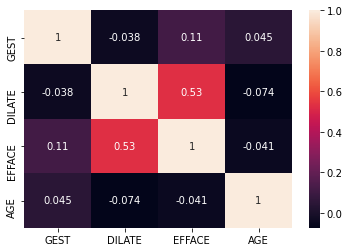

In [226]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Visualisation des données à l'aide de PCA (Principal Component Analysis)

L'analyse en composantes principales (ACP) est une technique de **réduction de dimensionnalité linéaire** qui peut être utilisée pour extraire des informations d'un espace de grande dimension en les projetant dans un sous-espace de dimension inférieure. Il essaie de préserver les parties essentielles qui ont plus de variation des données et de supprimer les parties non essentielles avec moins de variation.

Une chose importante à noter ici est que nous utilisons PCA pour découvrir comment les variables sont corrélées ou comprendre la distribution de quelques variables.

In [239]:
features = ['GEST', 'DILATE', 'EFFACE', 'AGE']
X = prematures[features]

In [240]:
#normalisation des données en utilisant standard scaler
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # normalizing the features

In [241]:
X.shape

(390, 4)

In [242]:
# Vérifions si les données normalisées ont une moyenne de 0 et un écart type de 1.
np.mean(X),np.std(X)

(4.7824991830006746e-17, 0.9999999999999999)

In [243]:
# L’analyse en composantes principales PCA
# PCA avec deux composantes
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduit = pca.fit_transform(X)

In [244]:
# créons un DataFrame qui aura les valeurs de composant principal
principal_composant_Df = pd.DataFrame(data = X_reduit
             , columns = ['principal component 1', 'principal component 2'])

In [245]:
principal_composant_Df.head()

,principal component 1,principal component 2
0,2.092122,-0.203364
1,2.679380,1.410836
2,2.038134,-0.442719
3,0.923103,0.674485
4,3.345080,1.934481


In [246]:
# pourcentage de la variance expliquée pour chaque composantes
print('Variance expliquée pour chaque composante: %s' % str(pca.explained_variance_ratio_))

Variance expliquée pour chaque composante: [0.38688876 0.26496261]


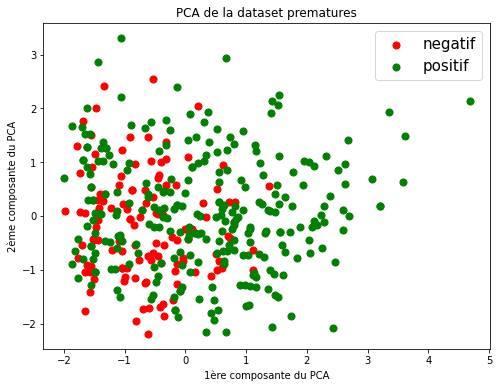

In [247]:
plt.figure(figsize=(8,6))
plt.xlabel("1ère composante du PCA")
plt.ylabel("2ème composante du PCA")
plt.title('PCA de la dataset prematures')
targets = ['negatif', 'positif']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = prematures['PREMATURE'] == target
    plt.scatter(principal_composant_Df.loc[indicesToKeep, 'principal component 1']
               , principal_composant_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

À partir du graphique ci-dessus, nous pouvons observer que les deux classes `positif` et `negatif`, lorsqu'elles sont projetées dans un espace bidimensionnel, ne peuvent pas être linéairement séparables.

### 1. Etude de la variable "GEST" en fonction de la prématurité du bébé

Text(0.5, 0, 'Prématurité du bébé')

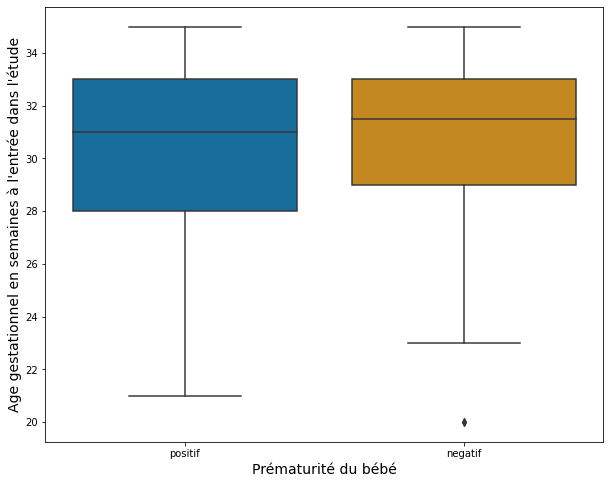

In [88]:
# affichage de la boite à moustache (boxplot) de la variable 'GEST' séparés par type d'accouchement (variable 'PREMATURE')
plt.figure(figsize=(10,8)) 
sns.boxplot(y='GEST', x='PREMATURE', 
                 data=prematures, 
                 palette="colorblind")
plt.ylabel("Age gestationnel en semaines à l'entrée dans l'étude", size=14)
plt.xlabel("Prématurité du bébé", size=14)

In [89]:
# Résumés statistiques
prematures[["PREMATURE", "GEST"]].groupby("PREMATURE").describe()

GEST                                                   
           count       mean       std   min   25%   50%   75%   max
PREMATURE                                                          
negatif    124.0  30.661290  3.011866  20.0  29.0  31.5  33.0  35.0
positif    266.0  30.135338  3.197362  21.0  28.0  31.0  33.0  35.0

### 2. Etude de la variable "Dilatation du col" en fonction de la prématurité du bébé

Text(0.5, 0, 'Prématurité du bébé')

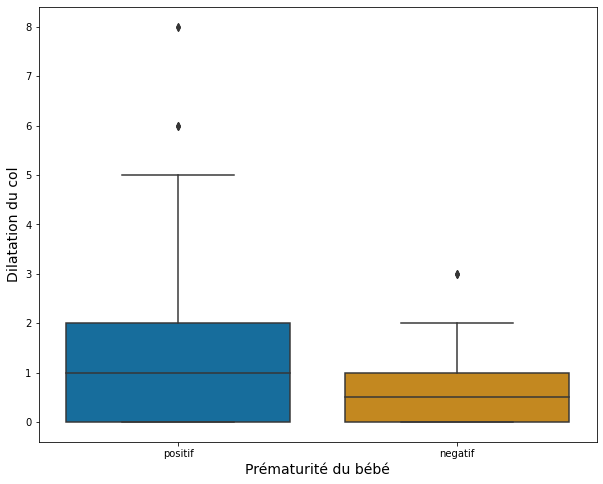

In [90]:
# affichage de la boite à moustache (boxplot) de la variable 'GEST' séparés par type d'accouchement (variable 'PREMATURE')
plt.figure(figsize=(10,8)) 
sns.boxplot(y='DILATE', x='PREMATURE', 
                 data=prematures, 
                 palette="colorblind")
plt.ylabel("Dilatation du col", size=14)
plt.xlabel("Prématurité du bébé", size=14)

In [91]:
# Résumés statistiques
prematures[["PREMATURE", "DILATE"]].groupby("PREMATURE").describe()

DILATE                                             
           count      mean       std  min  25%  50%  75%  max
PREMATURE                                                    
negatif    124.0  0.669355  0.783174  0.0  0.0  0.5  1.0  3.0
positif    266.0  1.507519  1.414860  0.0  0.0  1.0  2.0  8.0

### 3. Etude de la variable "Effacement du col" en fonction de la prématurité du bébé

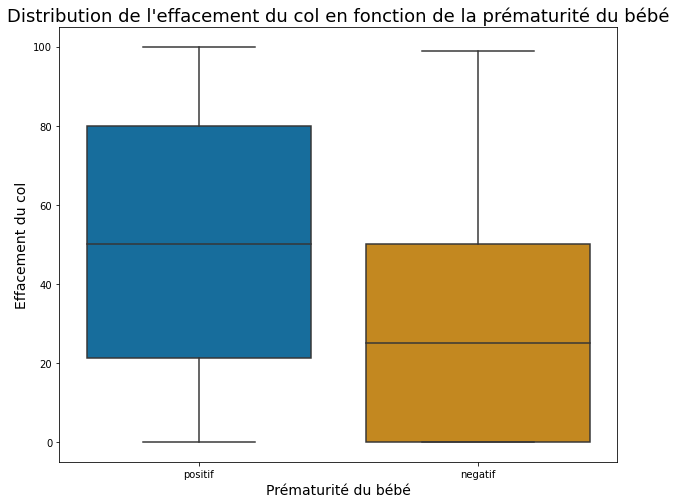

In [83]:
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(y='EFFACE', x='PREMATURE', 
                 data=prematures, 
                 palette="colorblind")
# Set labels and title
plt.ylabel("Effacement du col", size=14)
plt.xlabel("Prématurité du bébé", size=14)
plt.title("Distribution de l'effacement du col en fonction de la prématurité du bébé", size=18)
plt.savefig("boxplot_EFFACE_PREMATURE.png")

In [84]:
# Résumés statistiques
prematures[["PREMATURE", "EFFACE"]].groupby("PREMATURE").describe()

EFFACE                                                     
           count       mean        std  min    25%   50%   75%    max
PREMATURE                                                            
negatif    124.0  26.806452  26.128413  0.0   0.00  25.0  50.0   99.0
positif    266.0  51.984962  35.517943  0.0  21.25  50.0  80.0  100.0

### Commentaire 

  **- Chez les femmes n'ayant pas fait un accouchement prématuré**, l'effacement du col s'étend entre 0 et 99 % durant 
    l'accouchement. La moitié des femmes ont un effacement du col compris entre 0 et 50 % durant l'accouchement.
    L'effacement du col médian est de 25 % (l'effacement du col moyen est de 26,81 % avec un écart-type de 26,13 %).
    
  **- Chez les femmes ayant fait un accouchement prématuré**, l'effacement du col s'étend entre 0 et 100 % durant 
    l'accouchement. La moitié des femmes ont un effacement du col compris entre 21.25 et 80 % durant l'accouchement.
    L'effacement du col médian est de 50 % (l'effacement du col moyen est de 51,98 % avec un écart-type de 35,52 %).
   

### 4. Etude de la variable 'AGE de la patiente" en fonction de la prématurité du bébé

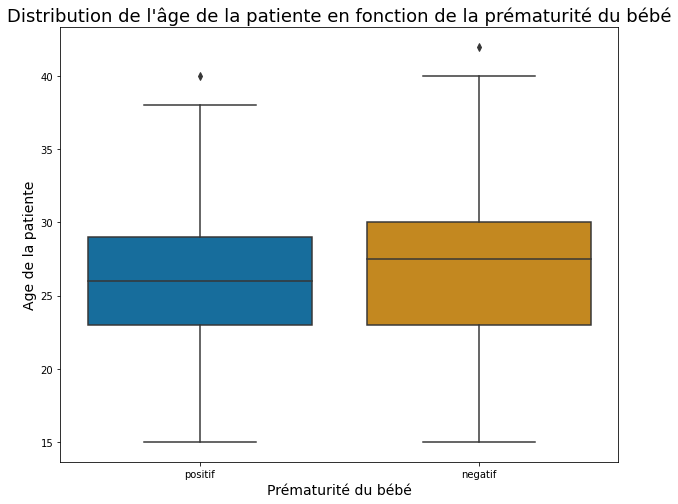

In [122]:
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(y='AGE', x='PREMATURE', 
                 data=prematures, 
                 palette="colorblind")
# Set labels and title
plt.ylabel("Age de la patiente", size=14)
plt.xlabel("Prématurité du bébé", size=14)
plt.title("Distribution de l'âge de la patiente en fonction de la prématurité du bébé", size=18)
plt.savefig("boxplot_AGE_PREMATURE.png")

In [94]:
# Résumés statistiques
prematures[["PREMATURE", "AGE"]].groupby("PREMATURE").describe()

AGE                                                   
           count       mean       std   min   25%   50%   75%   max
PREMATURE                                                          
negatif    124.0  27.056452  5.290431  15.0  23.0  27.5  30.0  42.0
positif    266.0  26.007519  5.058893  15.0  23.0  26.0  29.0  40.0

L'âge moyen chez les femmes ayant fait un accouchement prématuré est-il significativement différent de celui des femmes ayant fait un accouchement normal?

Comparons les moyennes des deux groupes pour voir s'ils sont `significativement différentes`.

In [95]:
prematures_mask_positif=prematures['PREMATURE']=='positif'
prematures_positif = prematures[prematures_mask_positif]

prematures_mask_negatif=prematures['PREMATURE']=='negatif'
prematures_negatif = prematures[prematures_mask_negatif]

#### Le test de Student permet de comparer deux échantillons.
#### Il va estimer la probabilité que la différence entre ces deux échantillons soit due au hasard (la p-value).

import scipy.stats as stats
test = stats.ttest_ind(prematures_positif['AGE'],prematures_negatif['AGE']) ; print(test)

Ttest_indResult(statistic=-1.8791434992676999, pvalue=0.060974241825219946)


La valeur renvoyée de p-value est ici de 0.0609..., il n'y a `donc pas de différence significative entre les moyennes` des deux groupes de femmes.

### 5. Etude de la variable "Consistance du col" en fonction de la prématurité du bébé

Nous allons faire un tri croisé sur les colonnes `CONSIS` et `PREMATURE` afin d'obtenir un tableau de contingence.

In [96]:
# Faire un tri croisé 
## Tableau de contingence : matrice des valeurs observées

TCO = pd.crosstab(prematures["CONSIS"], prematures["PREMATURE"])

TCO

PREMATURE,negatif,positif
CONSIS,,
1,26,29
2,50,77
3,48,160


In [248]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(prematures["CONSIS"],prematures["PREMATURE"])

resultats_test = chi2_contingency(table)

print("Statistique de test :", resultats_test[0])
print("p_valeur :", resultats_test[1])
print("degré de liberté :", resultats_test[2])

if resultats_test[1] < 0.05:
    print("Dans notre cas ci-dessus la p-valeur est bien inférieure à 5% on peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes.")
else:
    print("Dans notre cas ci-dessus la p-valeur est supérieure à 5% on conserve donc l’hypothèse selon laquelle les deux variables testées sont indépendantes.")

Statistique de test : 16.726344922272894
p_valeur : 0.00023330301374230867
degré de liberté : 2
Dans notre cas ci-dessus la p-valeur est bien inférieure à 5% on peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes.


Ici, nous pouvons observer que sur un total de 266 femmes ayant fait un `accouchement prématuré`, 160 ont une consistance du col en état `ferme` et sur un total de 124 femmes ayant fait `un accouchement normal`, 48 ont une consistance du col en état `ferme` lors de l'accouchement. Ainsi, le pourcentage de femmes ayant fait un accouchement normal et dont le col est ferme est de 38% et le pourcentage de femmes ayant fait un accouchement prématuré et dont le col est ferme est de 60%, ce qui est plus que le pourcentage de femmes ayant fait un accouchement normal et dont le col est ferme.

Nous allons maintenant visualiser ces données à l'aide du `diagramme en mosaïque`.

In [97]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('3', 'positif'),
               (0.0, 0.0, 0.528052805280528, 0.7666751852798365)),
              (('3', 'negatif'),
               (0.0,
                0.769997444416049,
                0.528052805280528,
                0.23000255558395089)),
              (('1', 'positif'),
               (0.533003300330033,
                0.0,
                0.13962934755013967,
                0.5255209906372696)),
              (('1', 'negatif'),
               (0.533003300330033,
                0.5288432497734822,
                0.13962934755013967,
                0.47115675022651765)),
              (('2', 'positif'),
               (0.6775831429296776,
                0.0,
                0.32241685707032236,
                0.6042849295000915)),
              (('2', 'negatif'),
               (0.6775831429296776,
                0.6076071886363041,
                0.32241685707032236,
                0.39239281136369575))]))

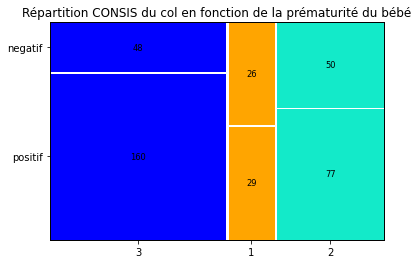

In [98]:
props={}
props[('1','negatif')]={'facecolor':'orange', 'edgecolor':'white'}
props[('1','positif')]={'facecolor':'orange', 'edgecolor':'white'}
props[('2','negatif')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('2','positif')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('3','negatif')]={'facecolor':'blue','edgecolor':'white'}
props[('3','positif')]={'facecolor':'blue','edgecolor':'white'}


labelizer=lambda k:{('1','negatif'):26,('2','negatif'):50,('3','negatif'):48,('1','positif'):29,('2','positif'):77,('3','positif'):160}[k]
mosaic(prematures,['CONSIS','PREMATURE'],labelizer=labelizer,properties=props, title='Répartition CONSIS du col en fonction de la prématurité du bébé')

On réalise un `test d'indépendance du chi 2` sur le tableau de contingence.

**Calcul de la p-value**

Cette valeur nous permet de décider si les variables `CONSIS` et `PREMATURE` sont indépendantes ou non en se fixant un seuil de décision.

`Scipy.stats` calcule lui-même le nombre de degrés de liberté à partir du tableau de contingence. Cela permet ensuite de calculer la pvaleur, en "observant" la courbe de densité de la loi du khi2 à k degrés de liberté.

`L'hypothèse H0` est que les deux variables sont indépendantes entre elles.

In [54]:
from scipy.stats import chi2_contingency

chi2, pvalue, degrees, expected = chi2_contingency(TCO)
chi2, degrees, pvalue

(16.726344922272894, 2, 0.00023330301374230867)

**Voici les valeurs récupérées :**

`Statistique khi2`

        chi2 = 16.73

`nombre de degrés de liberté`

        n = 2

`Pvalue : l'unique valeur nécessaire pour prendre notre décision`

        p = 0.00023

**Test au seuil de 5%**

Rejetons l’hypothèse nulle au seuil de 5%, donc pour une pvaleur inférieure à 0.05.

Dans notre cas, la pvaleur obtenue par notre étude est de `0.00023`, ce qui est en dessous du seuil fixé. On peut donc rejeter l’hypothèse nulle H0. Les variables `CONSIS` et `PREMATURE` ne sont pas indépendantes. Autrement dit, la consitance du col `est significativement liée` à la prématurité du bébé lors de l'accouchement.

**Tableau des fréquences attendues**

In [55]:
expected

array([[ 17.48717949,  37.51282051],
       [ 40.37948718,  86.62051282],
       [ 66.13333333, 141.86666667]])

### 6. Etude de la variable "Contraction" en fonction de la prématurité du bébé

In [99]:
#### Tableau de contingence : matrice des valeurs observées
TCO = pd.crosstab(prematures["CONTR"], prematures["PREMATURE"])
TCO

PREMATURE,negatif,positif
CONTR,,
1,117,238
2,6,27
3,1,1


In [100]:
#### modalités possibles de la variable CONTRACTION
prematures["CONTR"].unique()

array(['1', '2', '3'], dtype=object)

In [101]:
#### Regroupement sur la variable "CONTRACTION"
def contr_regroup(series) : 
    if series == '1':
        return '1'
    elif series == '2':
        return '2'
    elif series == '3':
        return '2'
    
prematures['CONTR'] = prematures['CONTR'].apply(contr_regroup)

prematures['CONTR'].value_counts()

1    355
2     35
Name: CONTR, dtype: int64

In [102]:
TCO = pd.crosstab(prematures["CONTR"], prematures["PREMATURE"])
TCO

PREMATURE,negatif,positif
CONTR,,
1,117,238
2,7,28


Ici, nous pouvons observer que sur un total de 124 femmes ayant fait `un accouchement normal`, 117 ont eu des contractions et sur un total de 266 femmes ayant fait un `accouchement prématuré`, 238 ont eu des contractions lors de l'accouchement. Ainsi, le pourcentage de femmes ayant fait un accouchement normal avec `présence de contraction` est de 94% et le pourcentage de femmes ayant fait un accouchement prématuré avec `présence de contraction` est de 89%, ce qui est moins que le pourcentage de femmes ayant fait un accouchement normal avec `présence de contraction`.

In [103]:
#### test d'indépendance du chi 2 sur le tableau de contingence
#### Test au seuil de 5%
from scipy.stats import chi2_contingency
chi2, pvalue, degrees, expected = chi2_contingency(TCO)
chi2, degrees, pvalue

(1.90536317590237, 1, 0.16747923552336452)

Dans notre cas, la pvaleur obtenue par notre étude est de `0.1674`, ce qui est en dessus du seuil fixé. On peut donc conserver l’hypothèse nulle H0. Les variables `CONTR` et `PREMATURE` sont indépendantes. Autrement dit, la contraction n'est pas significativement liée à la prématurité du bébé lors de l'accouchement.

### 7. Etude de la variable "MEMBRAN" en fonction de la prématurité du bébé

In [114]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(prematures["MEMBRAN"],prematures["PREMATURE"])

resultats_test = chi2_contingency(table)

print("Statistique de test :", resultats_test[0])
print("p_valeur :", resultats_test[1])
print("degré de liberté :", resultats_test[2])

if resultats_test[1] < 0.05:
    print("Dans notre cas ci-dessus la p-valeur est bien inférieure à 5% on peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes.")
else:
    print("Dans notre cas ci-dessus la p-valeur est supérieure à 5% on conserve donc l’hypothèse selon laquelle les deux variables testées sont indépendantes.")

Statistique de test : 36.96591329767542
p_valeur : 9.396236042812714e-09
degré de liberté : 2
Dans notre cas ci-dessus la p-valeur est bien inférieure à 5% on peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes.


### 8. Etude de la variable "GRAVID" en fonction de la prématurité du bébé

In [116]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(prematures["GRAVID"],prematures["PREMATURE"])

resultats_test = chi2_contingency(table)

print("Statistique de test :", resultats_test[0])
print("p_valeur :", resultats_test[1])
print("degré de liberté :", resultats_test[2])

if resultats_test[1] < 0.05:
    print("Dans notre cas ci-dessus la p-valeur est bien inférieure à 5% on peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes.")
else:
    print("Dans notre cas ci-dessus la p-valeur est supérieure à 5% on conserve donc l’hypothèse selon laquelle les deux variables testées sont indépendantes.")

Statistique de test : 8.352867311877253
p_valeur : 0.49901367455992285
degré de liberté : 9
Dans notre cas ci-dessus la p-valeur est supérieure à 5% on conserve donc l’hypothèse selon laquelle les deux variables testées sont indépendantes.


### 9. Etude de la variable "PARIT" en fonction de la prématurité du bébé

In [117]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(prematures["PARIT"],prematures["PREMATURE"])

resultats_test = chi2_contingency(table)

print("Statistique de test :", resultats_test[0])
print("p_valeur :", resultats_test[1])
print("degré de liberté :", resultats_test[2])

if resultats_test[1] < 0.05:
    print("Dans notre cas ci-dessus la p-valeur est bien inférieure à 5% on peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes.")
else:
    print("Dans notre cas ci-dessus la p-valeur est supérieure à 5% on conserve donc l’hypothèse selon laquelle les deux variables testées sont indépendantes.")

Statistique de test : 17.68477127641448
p_valeur : 0.013476161336760646
degré de liberté : 7
Dans notre cas ci-dessus la p-valeur est bien inférieure à 5% on peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes.


### 10. Etude de la variable "DIAB" en fonction de la prématurité du bébé

In [118]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(prematures["DIAB"],prematures["PREMATURE"])

resultats_test = chi2_contingency(table)

print("Statistique de test :", resultats_test[0])
print("p_valeur :", resultats_test[1])
print("degré de liberté :", resultats_test[2])

if resultats_test[1] < 0.05:
    print("Dans notre cas ci-dessus la p-valeur est bien inférieure à 5% on peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes.")
else:
    print("Dans notre cas ci-dessus la p-valeur est supérieure à 5% on conserve donc l’hypothèse selon laquelle les deux variables testées sont indépendantes.")

Statistique de test : 0.9691093120115447
p_valeur : 0.6159714548781959
degré de liberté : 2
Dans notre cas ci-dessus la p-valeur est supérieure à 5% on conserve donc l’hypothèse selon laquelle les deux variables testées sont indépendantes.


### 11. Etude de la variable "TRANSF" en fonction de la prématurité du bébé

In [119]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(prematures["TRANSF"],prematures["PREMATURE"])

resultats_test = chi2_contingency(table)

print("Statistique de test :", resultats_test[0])
print("p_valeur :", resultats_test[1])
print("degré de liberté :", resultats_test[2])

if resultats_test[1] < 0.05:
    print("Dans notre cas ci-dessus la p-valeur est bien inférieure à 5% on peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes.")
else:
    print("Dans notre cas ci-dessus la p-valeur est supérieure à 5% on conserve donc l’hypothèse selon laquelle les deux variables testées sont indépendantes.")

Statistique de test : 21.43355682541447
p_valeur : 3.663038557239542e-06
degré de liberté : 1
Dans notre cas ci-dessus la p-valeur est bien inférieure à 5% on peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes.


### 12. Etude de la variable "GEMEL" en fonction de la prématurité du bébé

In [120]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(prematures["GEMEL"],prematures["PREMATURE"])

resultats_test = chi2_contingency(table)

print("Statistique de test :", resultats_test[0])
print("p_valeur :", resultats_test[1])
print("degré de liberté :", resultats_test[2])

if resultats_test[1] < 0.05:
    print("Dans notre cas ci-dessus la p-valeur est bien inférieure à 5% on peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes.")
else:
    print("Dans notre cas ci-dessus la p-valeur est supérieure à 5% on conserve donc l’hypothèse selon laquelle les deux variables testées sont indépendantes.")

Statistique de test : 8.19922790848088
p_valeur : 0.004190822003158372
degré de liberté : 1
Dans notre cas ci-dessus la p-valeur est bien inférieure à 5% on peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes.


# II - Régression Logistique

Régression logistique = technique statistique permettant de modéliser l'effet de variables aléatoires (X1, X2, …, Xk) sur une variable aléatoire binaire Y.


La variable à expliquer Y est obligatoirement une variable qualitative à 2 classes (évènement/pas d'évènement, vrai/faux, échec/succès, décès/survie, …).

Les variables explicatives Xi peuvent être de n'importe quel type (quantitatives ou qualitatives)
Le modèle logistique permet :
 - de vérifier si une variable explicative Xi influe significativement sur Y
 - de quantifier la relation entre les variables explicatives et Y 
 - de prédire la valeur que va prendre Y en fonction des valeurs prises par les variables explicatives.


Le modèle logistique trouve de larges applications dans des domaines variés :
 - en médecine, étude des facteurs de risque de décès, de maladie, de guérison 
 - dans le domaine du marketing, étude des facteurs conduisant à un achat 
 - dans le domaine bancaire et des assurances, détection de groupes à risque.


### 1. Module Scikit-learn

La bibliothèque d’apprentissage automatique Scikit-learn fournit pour la régression logistique le module `sklearn.linear_model.LogisticRegression`.

- `LogisticRegression` peut prendre plusieurs paramètres dont :

- `random_state` : représente la graine du nombre pseudo-aléatoire généré. Ce dernier est utilisé lors de la réorganisation de données. Il peut prendre trois options, notamment :

- `int` : `random_state` dans ce cas est la graine utilisée par le générateur de nombres aléatoires.
- `RandomState instance` : `random_state` dans ce cas est le générateur de nombres aléatoires.
- `None` : le générateur de nombres aléatoires est l’instance `RandomState` qui est utilisée par `np.random`.

Par défaut ce paramètre prend None.

- `solver` : ce paramètre représente l’algorithme à utiliser pour le problème d’optimisation. Il peut prendre l’une des options suivantes :

  - `linlinear` : le meilleur choix pour les petits ensembles de données. Il gère la pénalité L1.
  - `newton-cg` : gère que la pénalité L2.
  - `lbfgs` : gère la perte multinomiale pour les problèmes multi classes. Il ne gère également que la pénalité L2.
  - `saga` : représente un bon choix pour les grands ensembles de données. Pour les problèmes multi classes, il gère les pertes `multinomiales`. Il prend en charge la pénalité L1 et la pénalité « `elasticnet`».
  - `sag` : cette option est aussi idéale pour les grands ensembles de données et gère la perte multinomiale pour les problèmes multi classes.
Par défaut ce paramètre prend `linlinear`.

- `multi_class` : ce paramètre présente les options suivantes :

   - `ovr` : si cette option est choisie, donc un problème binaire est adapté à chaque étiquette.
   - `multin` : si cette option est choisie, alors la perte minimisée est l’ajustement de la perte multinomiale sur l’ensemble de la distribution de probabilité. Cette option ne marche pas avec le solveur « `lbfgs`».
   
Par défaut ce paramètre prend `ovr`.

### 2. Attributs de la régression logistique

Les attributs du `LogisticRegression` sont les suivants :

- `coef_` : renvoi le coefficient des caractéristiques de la fonction de décision.

- `intercept_` : représente la constante ajoutée à la fonction de décision.

- `n_iter_` : renvoi le nombre réel d’itérations pour chaque classe.

On définit deux variables X et Y représentant respectivement des valeurs caractéristiques (features) et la valeur cible (target). Ensuite, on utilise la fonction **train_test_split** pour fractionner l’ensemble de données en données d’entrainement et de test suivant le pourcentage par défaut 75/25%.

On crée par la suite une instance de l’objet **LogisticRegression**. On entraine cette instance en utilisant la méthode **fit()** qu’on lui passe en paramètre **x_train** et **y_train**. Pour prédire si une femme a fait un accouchement prématuré ou non on donne au modèle les valeurs de test et on lui applique la méthode **predict()**.

Puis, en faisant appel à la méthode **score()** on calcule la précision du modèle.

**Méthode 1** 

In [124]:
caracteristique = ['GEST', 'DILATE', 'EFFACE', 'CONSIS', 'MEMBRAN', 'AGE','PARIT', 'TRANSF', 'GEMEL']
x = prematures[caracteristique]
y = prematures.PREMATURE
#fractionner dataset (train-test)
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size = 0.25, random_state = 0)
#instanciation du modèle
modele_regLog = linear_model.LogisticRegression()
#training
modele_regLog.fit(x_train, y_train)
#prediction
prediction = modele_regLog.predict(x_test)
print('prédiction du modèle:', prediction)
#calcule de précision : Mesure des performances du modèle
precision = modele_regLog.score(x_test, prediction)
print('la précision du modèle', precision * 100)

prédiction du modèle: ['positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'negatif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'negatif' 'positif' 'negatif' 'negatif'
 'negatif' 'positif' 'negatif' 'negatif' 'positif' 'negatif' 'positif'
 'positif' 'positif' 'negatif' 'negatif' 'negatif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'negatif' 'negatif' 'positif' 'positif'
 'negatif' 'positif' 'negatif' 'negatif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif' 'negatif'
 'positif' 'negatif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'positif' 'negatif' 'negatif' 'negatif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'neg

C:\Users\niang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
print(modele_regLog.coef_, modele_regLog.intercept_)

[[ 0.01466666  0.55562393  0.01037879 -0.08224594 -0.97542347 -0.00964433
  -0.38253582 -0.50392651  1.52252547]] [1.1415202]


**Méthode 2** 

In [126]:
#### On crée une nouvelle colonne etiquette_PREMATURE qui reçoit 0 si PREMATURE == "négatif" ou 1 sinon
prematures['etiquette_PREMATURE'] = np.where(prematures['PREMATURE']=="negatif", '0', '1')

prematures.head()

On crée ci-contre une correspondance entre la valeur de l’étiquette de PREMATURE et son nom dans le but de faciliter l’interprétation des résultats. Puis, on définit deux variables x et y représentant respectivement des valeurs caractéristiques et la valeur cible.

Ensuite, on utilise la fonction **train_test_split** pour fractionner l’ensemble de données en données d’entrainement et de test suivant le pourcentage par défaut 75/25%.

On crée par la suite une instance de l’objet **LogisticRegression**, qu’on lui passe en paramètres **random_state**, **solver** et **multi_class**.

Finalement, on entraine cette instance en utilisant la méthode **fit()** qu’on lui passe en paramètre **x_train** et **y_train**. Puis, en faisant appel à la méthode **score()** on calcule la précision du modèle.

In [128]:
nom_PREMATURE_cible = dict(zip(prematures.etiquette_PREMATURE.unique(), prematures.PREMATURE.unique()))
print(nom_PREMATURE_cible)
#valeurs caractéristiques et valeur cible
x = prematures[['GEST', 'DILATE', 'EFFACE', 'CONSIS', 'MEMBRAN', 'AGE', 'PARIT', 'TRANSF', 'GEMEL']]
y = prematures['etiquette_PREMATURE']
#fractionner dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
#instanciation du modèle
modele_regLog = linear_model.LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')
#training
modele_regLog.fit(x_train,y_train)
#précision du modèle
precision = modele_regLog.score(x_test,y_test)
print(precision*100)

{'1': 'positif', '0': 'negatif'}
75.51020408163265


On donne au modèle de régression logistique : 

    - l'âge gestationnel en semaines à l'entrée dans l'étude,
    - la dilatation du col en cm,
    - l’effacement du col (en %),
    - la consistance du col,
    - les membranes rompues ou non ou incertain,
    - l’âge de la patiente,
    - la parité
    - le transfert ou non vers un hôpital en soins spécialisés
    - le type de grossesse : simple ou multiple

durant l'accouchement de la patiente et on lui demande de classifier cet accouchement en utilisant la méthode de prédiction predict().

In [129]:
#prédiction
prediction_accouchement = modele_regLog.predict([[31, 3, 100, 3, 2, 26, 0, 2, 1]])
nom_PREMATURE_cible[prediction_accouchement[0]]

'positif'

In [130]:
#prédiction
prediction_accouchement = modele_regLog.predict([[33,0,25,2,3,24,1,2,1]])
nom_PREMATURE_cible[prediction_accouchement[0]]

'negatif'

**INTERPRÉTATION DES COEFFICIENTS DE RÉGRESSION LOGISTIQUE**

In [131]:
df = prematures

def recodage(series) : 
    if series == 'positif':
        return 1.0
    else : 
        return 0.0
    
df['PREMATURE'] = df['PREMATURE'].apply(recodage)

df['PREMATURE'].value_counts()

#### Changer les types des variables en FLOAT 
df = df.astype("float")

In [134]:
#### Ajustons le modèle et visualisez la sortie récapitulative.

import numpy as np
import statsmodels.api as sm

model = sm.Logit(df.PREMATURE, df[['GEST', 'DILATE', 'EFFACE', 'CONSIS', 'MEMBRAN', 'AGE', 'PARIT', 'TRANSF', 'GEMEL']])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.496010
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              PREMATURE   No. Observations:                  390
Model:                          Logit   Df Residuals:                      381
Method:                           MLE   Df Model:                            8
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.2068
Time:                        16:23:16   Log-Likelihood:                -193.44
converged:                       True   LL-Null:                       -243.87
Covariance Type:            nonrobust   LLR p-value:                 2.852e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GEST           0.0027      0.029      0.093      0.926      -0.055       0.060
DILATE         0.4143      0.151      2.740      0.006       0.118       0.711
EFFACE         0.0153      0.005      3.309      0.001       0.006       0.024
CONSIS         0.0558      0.182      0.307      0.759      -0.300       0.412
MEMBRAN       -1.0055      0.287     -3.502      0.000      -1.568      -0.443
AGE            0.0126      0.024      0.518      0.605      -0.035       0.060
PARIT         -0.3752      0.136     -2.769      0.006      -0.641      -0.110
TRANSF        -0.5906      0.263     -2.246      0.025      -1.106      -0.075
GEMEL          2.1779      0.708      3.077      0.002       0.790       3.565
==============================================================================
"""

In [135]:
np.exp(result.params)

GEST       1.002726
DILATE     1.513328
EFFACE     1.015411
CONSIS     1.057375
MEMBRAN    0.365855
AGE        1.012637
PARIT      0.687185
TRANSF     0.553997
GEMEL      8.828048
dtype: float64

# III - Arbre de décision simple

## A - Import des librairies
Importer les librairies puis le jeu de données 

In [171]:
# Importer les modules importants de scikit-learn (noté sklearn)
##     importer la fonction train_test_split du module sklearn.model_selection 
from sklearn.model_selection import train_test_split

##     importer la classe DecisionTreeClassifier et les fonction plot_tree, export_text depuis le module sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text

##     importer les fonctions confusion_matrix et  accuracy_score depuis le module sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [172]:
# Importer le jeu de donnnées "Prematures.xls" avec pandas et le mettre dans une variable appelée : prematures 

prematures = pd.read_excel("data/Prematures.xls")

# Afficher les premières lignes 

prematures.head()

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE
0,31,3,100,3,1,2,26,1,0,2,2,1,positif
1,28,8,0,3,1,2,25,1,0,2,1,2,positif
2,31,3,100,3,2,2,28,2,0,2,1,1,positif
3,27,2,75,3,2,2,27,2,1,2,1,2,positif
4,28,6,75,3,2,2,17,1,0,2,1,1,positif


## B - Etude des variables initiales du jeu de données

Dans un premier temps nous allons préparer le jeu de donnée `prematures` en vue de réaliser l'apprentissage supervisé d'un arbre de décision. 

Pour ce faire, il est nécessaire de séparer les données d'entrées correspondant aux variables descriptives du problème (GEST, DILATE, EFFACE, CONSIS, CONTR, MEMBRAN, AGE, GRAVID, PARIT, DIAB, TRANSF, GEMEL) de la variable de sortie appelée aussi variable objective du problème (PREMATURE). 

On utilise généralement `X` comme nom de variable correspondant aux données d'entrée et `y` la variable de sortie. 

In [173]:
# Créer une variable X_columns (liste) avec les colonnes "GEST", "DILATE", "EFFACE", "CONSIS","CONTR", "MEMBRAN", "AGE", "GRAVID", "PARIT", "DIAB", "TRANSF", "GEMEL"
X_columns = ['GEST', 'DILATE', 'EFFACE', 'CONSIS', 'MEMBRAN', 'AGE', 'PARIT', 'TRANSF', 'GEMEL']

# Mettre dans une variable X le résultat du filtrage du dataset iris sur les colonnes de X_columns
X = prematures[X_columns]

# Mettre dans la variable y la colonne "PREMATURE"
Y = prematures.PREMATURE

Une fois cette première étape réalisée, il est ensuite nécessaire de séparer le jeu de données en données d'entraînement (80% du jeu de données) et données de test (20% restants). 

Pour cela on utilisera la fonction `train_test_split` de la librairie scikit-learn. Celle-ci permet de **séparer aléatoirement** le jeu de données. Elle prend en entrée `X` et `y` retourne 4 variables  `X_train, X_test, y_train, y_test`. Afin de "contrôler l'aléatoire" de cette séparation, nous rajouterons en entrée de la fonction `random_state=18` afin d'avoir tous le même jeu de données. (On aurait pu choisir n'importe quelle valeur autre que 18 mais cette valeur me permettra d'être sure que vous obtiendrez tous le même arbre de décision). 

In [174]:
# Séparer les données de (X et y) et données d'entrainement et de test en utilisant la fonction `train_test_split`
## Ne pas oublier le parametre "random_state=18"

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size = 0.20, random_state = 18)

Nous allons maintenant créer une instance d'arbre de décision en appelant `DecisionTreeClassifier()`. Nous utiliserons pour l'instant les paramètres par défaut de ce type d'arbre.. mais vous pouvez aller consulter l'aide (`help(DecisionTreeClassifier)`) pour plus de précisions sur les paramètres possibles.

Pour l'entraîner, il suffit d'appeler la méthode `fit` sur l'instance créée et lui passer en paramètre `X_train` et `y_train` (dans cet ordre). 

In [175]:
# Créer une instance de la classe `DecisionTreeClassifier` dans une variable appelée : dt
dt = DecisionTreeClassifier()

# Appeler la méthode fit sur l'instance créée avec en paramètre X_train et y_train
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

Nous allons maintenant essayer d'afficher l'arbre de décision pour comprendre les règles qu'il a construit. Pour cela : 
- dans un premier temps nous afficherons sous forme de texte l'ensemble de règles construites avec la fonction `export_text` (importée du module tree de sklearn). Elle prend en paramètre `dt` un arbre de décision entraîné, et `feature_names` la liste des variables utilisées dans X (par exemple X.columns)

- dans un second temps, nous l'afficherons sous forme de graphe avec la fonction `plot_tree` (issue du module tree de sklearn). Elle prend en paramètre `dt` un arbre de décision entraîné, `feature_names` la liste des variables utilisées dans X (et éventuellement filled=True pour une meilleure lisibilité). 

Remarque : Nous utiliserons `plt.figure(figsize=(20,20)` avant la création du graphe puis `plt.show()` après pour obtenir un graphe plus grand. Nous pourrons également ajouter un titre avant l'appel à `plt.show()` pour plus de clarté.

In [176]:
# Utiliser la fonction print sur la sortie de la fonction export_text avec en parametre dt et le nom des colonnes du jeu de données 
r = export_text(dt, feature_names=X_columns)
print(r)

|--- EFFACE <= 72.50
|   |--- MEMBRAN <= 1.50
|   |   |--- GEST <= 22.00
|   |   |   |--- class: negatif
|   |   |--- GEST >  22.00
|   |   |   |--- CONSIS <= 1.50
|   |   |   |   |--- GEST <= 30.00
|   |   |   |   |   |--- class: positif
|   |   |   |   |--- GEST >  30.00
|   |   |   |   |   |--- GEST <= 32.50
|   |   |   |   |   |   |--- AGE <= 33.50
|   |   |   |   |   |   |   |--- class: negatif
|   |   |   |   |   |   |--- AGE >  33.50
|   |   |   |   |   |   |   |--- class: positif
|   |   |   |   |   |--- GEST >  32.50
|   |   |   |   |   |   |--- class: positif
|   |   |   |--- CONSIS >  1.50
|   |   |   |   |--- GEST <= 28.50
|   |   |   |   |   |--- CONSIS <= 2.50
|   |   |   |   |   |   |--- class: positif
|   |   |   |   |   |--- CONSIS >  2.50
|   |   |   |   |   |   |--- GEMEL <= 1.50
|   |   |   |   |   |   |   |--- class: negatif
|   |   |   |   |   |   |--- GEMEL >  1.50
|   |   |   |   |   |   |   |--- class: positif
|   |   |   |   |--- GEST >  28.50
|   |   |   |   

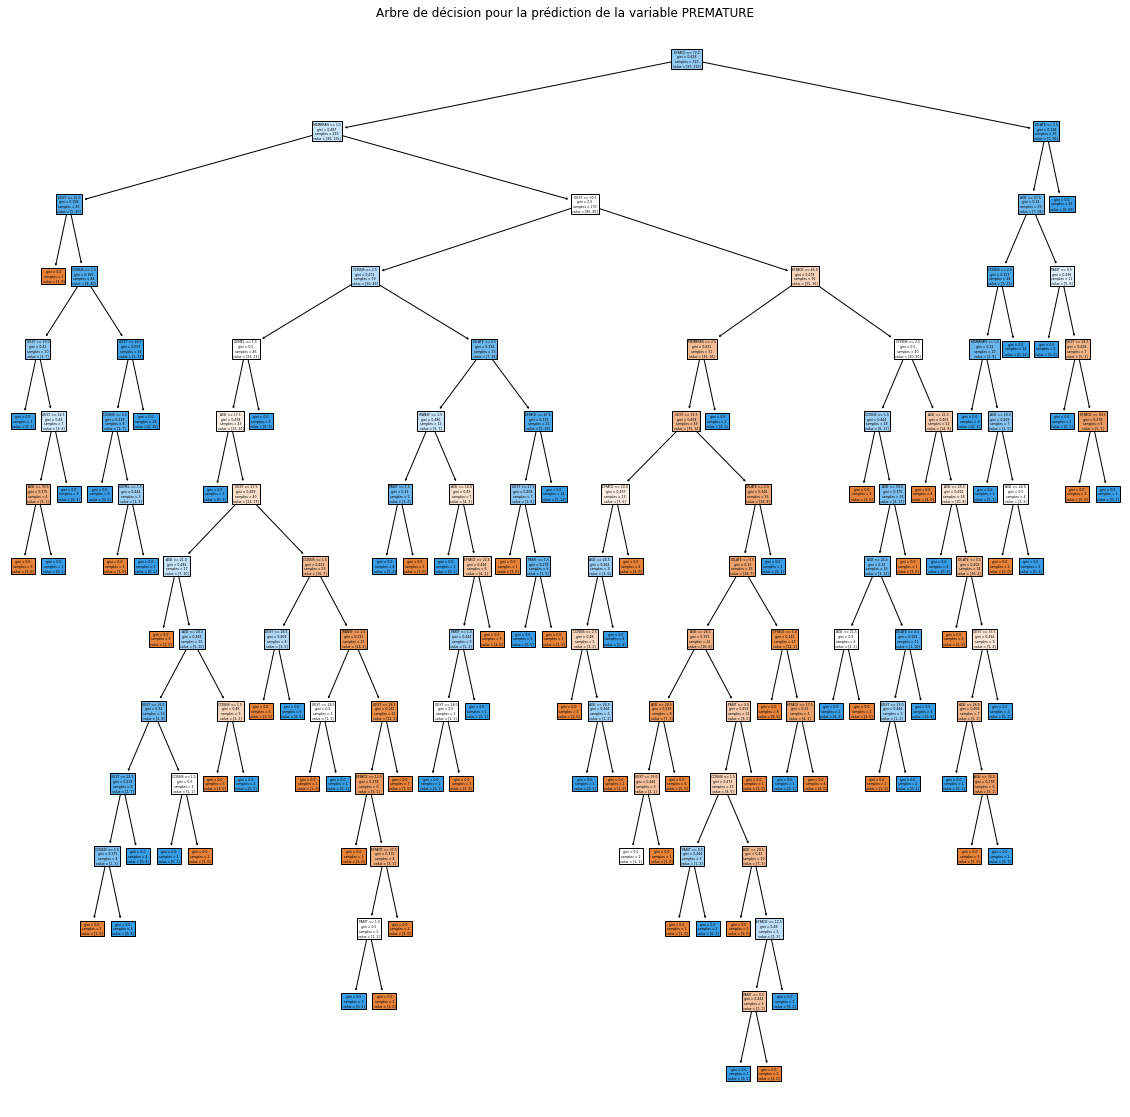

In [177]:
plt.figure(figsize=(20,20)) # permet d'aggrandir la taille de la figure

# Utiliser la fonction plot_tree avec en parametre dt et le nom des colonnes du jeu de données 
plot_tree(dt,feature_names=X_columns,filled=True)

# rajouter un titre
plt.title('Arbre de décision pour la prédiction de la variable PREMATURE')

# utiliser la fonction d'afficahge de matplotlib 
plt.show()

#### Evaluation de la qualité des résultats fournis par l'arbre de décision

**Méthode 1** \
Dans cette dernière partie, nous allons évaluer la qualité de l'arbre construit au regard de la tâche de séparation des 2 types d'accouchement (prématuré ou normal). Pour ce faire, nous allons utiliser la partie du jeu de donnés qui n'a pas été utilisée pendant l'entraînement de l'arbre de décision `X_test` pour : 
- réaliser une prédiction avec en utilisant l'arbre de décision(`y_predict`)  
- et évaluer la similitude entre `y_predict` et `y_test` 

Pour réaliser une prédiction, il faut appeler la méthode `predict` de l'arbre en lui passant en paramètre `X_test` : 


In [178]:
# mettre le résultat méthode prédict appliquée au dataset de test dans une nouvelle variable y_predict
y_predict = dt.predict(X_test)

Dans le cas de méthodes de classification, l'évaluation de la qualité de l'arbre (ou de la méthode de prédiction en général) se fait au moyen de la fonction `accuracy_score` du module metrics de sklearn. Elle prend en paramètre y_test et y_predict et retourne un score entre 0 et 1 correspondant à la fraction d'exemples correctement classifiés.

In [179]:
# utiliser la fonction accuracy_score avec en paramètre y_test et y_predict
accuracy_score(Y_test, y_predict)

0.7051282051282052

**Méthode 2** \
On peut également obtenir le score de performance de l'arbre de décision grâce à la méthode `score` de `dt`. Cette méthode prend en paramètre `X_test` et `y_test` et retourne le même score d'accuracy que précédemment. On peut donc faire le même calcul en 1 seule ligne au lieu de 2.

In [180]:
# utiliser la méthode score de l'objet dt avec en paramètres X_test et Y_test
dt.score(X_test,Y_test)

0.7051282051282052

Pour aller plus loins dans l'analyse, il est aussi possible d'utiliser la fonction `confusion_matrix` du module metrics de sklearn (`metrics.sklearn`). Elle retourne un tableau où chaque ligne correspond à la classe prédite et chaque colonne à la vraie classe.

Pour que toutes les classes soient correctement classifiées, il faut qu'il n'y ait que des éléments sur la diagonale. 

In [181]:
# Scikit-Learn permet aussi de calculer la matrice de confusion:
# application de la fonction confusion_matrix avec en paramètres Y_test et y_predict

conf = confusion_matrix(Y_test, y_predict)
conf

array([[15, 12],
       [11, 40]], dtype=int64)

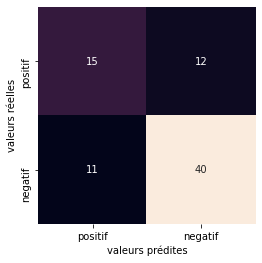

In [182]:
# Et Seaborn permet de la représenter avec le Heatmap

sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(prematures["PREMATURE"].unique())
            , yticklabels=list(prematures["PREMATURE"].unique()))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

Sur les 78 accouchements prédits, 10 accouchements normaux ont été confondues avec des accouchements prématurés. De plus, 12 accouchements prématurés ont été confondues avec des accouchements normaux.

Voyons si on peut mieux faire.. 

# IV - Random Forest

### A - Import la classe RandomForestClassifier

Importer la classe RandomForestClassifier à partir du module ensemble de sklearn.

In [183]:
# Importer la classe RandomForestClassifier issue du module sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

### B - Préparation du jeu de données pour l'entrainement de random forest
Nous devons séparer le jeu de données en variables descriptives à mettre en entrée de la prédiction (dans la variable `X`) et la variable cible, celle de la sortie à prédire (variable `y`).

Cette fois-ci nous allons utiliser une autre méthode du dataframe : `drop`
Cette méthode prend en paramètre `columns=une_liste_des_variables_à_supprimer` et retourne **une copie** du jeu de données sans les colonnes que l'on a supprimé. **Le jeu de données d'origine n'a lui pas été modifié**

Remarque : si l'on souhaite supprimer directement la colonne dans le jeu de données il faut rajouter l'argument `inplace=True`

In [188]:
# utiliser la méthode drop sur le dataframe prematures avec en paramètre une liste comportant "PREMATURE" et mettre le résultat dans une variable : X
# X = prematures.drop(columns=["PREMATURE"],inplace=True)
X = prematures.drop(columns=["PREMATURE"])
X = X[X_columns]

# récupérer la colonne PREMATURE du dataframe prematures et le mettre dans la variable y 
Y = prematures.PREMATURE

Séparer enfin le jeu de données (X et y) et données d'entraînement et de test. 
**On choisit ici random_state=42**

In [190]:
# séparation de X et y en jeu de données d'entrainement et de test avec la fonction train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

Créer une forêt d'arbres de décision `RandomForestClassifier` et l'entraîner.

**/!\** Utiliser le paramètre **random_state=42** pour pouvoir comparer vos résultats entre vous

Ex : `RandomForestClassifier(random_state=42)`

In [191]:
# création d'une forêt aléatoire (random forest) dans la variable : rf
rf = RandomForestClassifier(random_state=42)

In [192]:
# Entrainement de la forêt sur le jeu de données d'entraînement 
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

Evaluer la performance de votre classifier 

In [193]:
# Utilisons la méthode de votre choix pour évaluer la performance de la forêt aléatoire  
rf.score(X_test,Y_test)

0.7448979591836735

### C - Comparaison du score à celui d'un arbre de décision classique
Nous pouvons maintenant nous comparer à l'arbre de décision seul (exécuter simplement la cellule) 

In [194]:
def compare_to_decision_tree(X_train, X_test, Y_train, Y_test):
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, Y_train)
    y_predict = dt.predict(X_test)
    score = accuracy_score(Y_test, y_predict)
    print('Accuracy du decision tree seul : {}'.format(score))
    
    
compare_to_decision_tree(X_train, X_test, Y_train, Y_test)

Accuracy du decision tree seul : 0.6938775510204082


Si notre score est supérieur à celui de l'arbre de décision seul, bravo ! 
Sinon, essayons de choisir de nouveaux paramètres à rajouter lors de la création de notre forêt d'arbres aléatoire. 



### D - Les attributs de la classe RandomForestClassifier

Une fois entraîné, on peut accédé à différents attributs intéressants de l'objet random forest. Nous en présenterons deux ici : 
- l'attribut `estimators_` permet d'accéder à **tous les arbres seuls qui constituent notre forêt**. Ils sont présentés sous forme d'une liste (pour rappel chaque élément peut être accédé par son indice dans la liste). 

- l'attribut `feature_importances_` permet d'estimer l'**importance de chacune des variables d'entrée** dans le résultat prédit par la forêt.

In [195]:
rf.feature_importances_

array([0.18274906, 0.08967654, 0.19032018, 0.07385979, 0.09271156,
       0.20589609, 0.09342569, 0.04456237, 0.02679873])

In [196]:
# Exemple d'affichage avec pandas 
pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Feature importance']).style.background_gradient(cmap="coolwarm")

,Feature importance
GEST,0.182749
DILATE,0.089677
EFFACE,0.190320
CONSIS,0.073860
MEMBRAN,0.092712
AGE,0.205896
PARIT,0.093426
TRANSF,0.044562
GEMEL,0.026799


Plus les nombres renvoyés par `rf.feature_importances_` sont élevés, plus ils sont importants dans cette tâche de classification .

# V - Classification Naive Bayes

Nous proposons ici la `classification Naive Bayes` qui suppose que chaque classe est construite à partir d'une distribution Gaussiènne alignée.

On importe dans un premier temps les éléments nécessaires, à savoir : `pandas`, `numpy`, `seaborn` `train_test_split`, `GaussianNB` et `accuracy_score`.

In [197]:
# Importer la classe GaussianNBr issue du module sklearn.naive_bayes
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Ensuite, on charge le fichier Excel contenant les données et on affiche les  5 premiers enregistrements pour avoir une idée sur l’ensemble de données.

In [198]:
prematures = pd.read_excel("data/Prematures.xls")
prematures.head()

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE
0,31,3,100,3,1,2,26,1,0,2,2,1,positif
1,28,8,0,3,1,2,25,1,0,2,1,2,positif
2,31,3,100,3,2,2,28,2,0,2,1,1,positif
3,27,2,75,3,2,2,27,2,1,2,1,2,positif
4,28,6,75,3,2,2,17,1,0,2,1,1,positif


In [199]:
#### Créer une nouvelle colonne etiquette qui reçoit 0 si PREMATURE == "négatif" ou 1 sinon
prematures['etiquette'] = np.where(prematures['PREMATURE']=="negatif", '0', '1')
prematures.head()

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE,etiquette
0,31,3,100,3,1,2,26,1,0,2,2,1,positif,1
1,28,8,0,3,1,2,25,1,0,2,1,2,positif,1
2,31,3,100,3,2,2,28,2,0,2,1,1,positif,1
3,27,2,75,3,2,2,27,2,1,2,1,2,positif,1
4,28,6,75,3,2,2,17,1,0,2,1,1,positif,1


In [200]:
#Encodage
accouchement_premature = dict(zip(prematures.etiquette.unique(), prematures.PREMATURE.unique()))
print(accouchement_premature)
x = prematures[['GEST', 'DILATE', 'EFFACE', 'CONSIS', 'MEMBRAN', 'AGE', 'PARIT', 'TRANSF', 'GEMEL']]
y = prematures['PREMATURE']

{'1': 'positif', '0': 'negatif'}


In [201]:
#fractionner dataset (train-test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [202]:
# Création du classifieur
clf = GaussianNB()

In [203]:
# Apprentissage
clf.fit(x_train, y_train)

GaussianNB()

In [204]:
# prédiction
prediction = clf.predict(x_test)
print(prediction)

['positif' 'negatif' 'negatif' 'positif' 'positif' 'negatif' 'negatif'
 'positif' 'positif' 'positif' 'negatif' 'negatif' 'positif' 'negatif'
 'negatif' 'positif' 'positif' 'positif' 'positif' 'negatif' 'negatif'
 'negatif' 'negatif' 'positif' 'positif' 'negatif' 'positif' 'negatif'
 'positif' 'positif' 'negatif' 'positif' 'negatif' 'positif' 'positif'
 'negatif' 'positif' 'negatif' 'positif' 'positif' 'negatif' 'negatif'
 'positif' 'positif' 'positif' 'positif' 'negatif' 'negatif' 'negatif'
 'negatif' 'positif' 'negatif' 'positif' 'negatif' 'positif' 'negatif'
 'positif' 'negatif' 'negatif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'negatif' 'negatif'
 'negatif' 'positif' 'negatif' 'negatif' 'positif' 'negatif' 'negatif'
 'positif']


In [205]:
# evaluation du modèle : Qualité de la prédiction
precision = accuracy_score(y_test, prediction)*100
print(precision)

74.35897435897436


In [206]:
# matrice de confusion:

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, prediction)
conf

array([[20,  4],
       [16, 38]], dtype=int64)

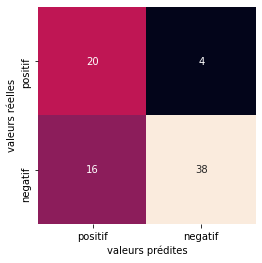

In [207]:
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(prematures["PREMATURE"].unique())
            , yticklabels=list(prematures["PREMATURE"].unique()))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');